In [ ]:
#Code to compute the internal energy change during impulsive encounter with a spherical perturber along straight orbit

#Computes and plots both non-perturbative and tidal limit \Delta E_{int} vs impact parameter for different values of rp/rs

#-------Created by Uddipan Banik-------

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import random
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.pylab import *
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.ticker as ticker
from matplotlib.patches import BoxStyle
from scipy import integrate
from scipy import optimize
from scipy.optimize import fsolve
from scipy.interpolate import CubicSpline,interp1d
from scipy.special import erf as errorfunc
from scipy.special import gamma, factorial
from scipy.signal import argrelextrema 
from matplotlib import cm
from numpy import linalg
import time
import os
import h5py
import string
from straight_functions_spherical_perturber import *

#-----------------------------------------------------------------



In [4]:
#-------Input parameters-------

bmin=0.01                    #Minimum impact parameter #0.01
bmax=100                     #Maximum impact parameter
Nb=10                       #No of points in impact parameter range

impact=np.logspace(np.log10(bmin),np.log10(bmax),num=Nb) #Impact parameter


mass_ratio=1e-2              #Subject mass Ms/Perturber mass Mp
rp=1e1                       #Perturber scale radius rp in units of rs: 1e-2 -> 1e2
Rc=1                         #Truncation radius (<bmin for point perturber)
rmax=1000                    #Maximum radius for integration over subject profile; should be at least 2 times bmax (<bmin for point perturber)

Rinterpmax=rmax
Rtruncinterpmax=Rc
NRinterp=1000

perturber_flag=3             #perturber_flag: 1: Point mass, 2: Plummer sphere, 3: Hernquist sphere, 4: NFW, 5: Isochrone
subject_flag=2               #subject_flag: 1: Plummer sphere, 2: Hernquist sphere, 3: NFW



#-------Integration parameters------- 

EPSABS0=1e-8                 #Absolute tolerance, default: 1e-8
EPSREL0=1e-8                 #Relative tolerance, default: 1e-8

#-----------------------------------------------------------------


In [5]:
#-------Internal energy change-------

#General formalism

E=np.zeros(Nb)                                           #Infinite subject: Total energy change
Etrunc=np.zeros(Nb)                                      #Truncated subject: Total energy change
Ecm=np.zeros(Nb)                                         #Infinite subject: COM energy change
Ecmtrunc=np.zeros(Nb)                                    #Truncated subject: COM energy change

start=time.time()

for i in range(Nb):
    E[i]=F(impact[i],rmax,rp,perturber_flag,subject_flag)
    Ecm[i]=Fcm(impact[i],rmax,rp,perturber_flag,subject_flag)
    
    Etrunc[i]=F(impact[i],Rc,rp,perturber_flag,subject_flag)
    Ecmtrunc[i]=Fcm(impact[i],Rc,rp,perturber_flag,subject_flag)
    
    end=time.time()
    print ("%d\tTime taken: %f s\n" %(i,abs(end-start)))
    
Eint=E-Ecm                                               #Infinite subject: Internal energy change
Eint_trunc=Etrunc-Ecmtrunc                               #Truncated subject: Internal energy change

/home/uddipan/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:865: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


0	Time taken: 48.898511 s

1	Time taken: 97.743419 s

2	Time taken: 152.857452 s

3	Time taken: 254.642867 s

4	Time taken: 347.113765 s

5	Time taken: 525.680154 s

6	Time taken: 855.649853 s

7	Time taken: 1007.846038 s

8	Time taken: 1081.533808 s

9	Time taken: 1105.987909 s



In [6]:
#Head-on encounter

if (perturber_flag==2):
    Eint0=integrate.quad(F0_integrand_plummer,0,rmax,args=(rp,subject_flag,),epsabs=EPSABS0,epsrel=EPSREL0)[0]
    Eint0_trunc=integrate.quad(F0_integrand_plummer,0,Rc,args=(rp,subject_flag,),epsabs=EPSABS0,epsrel=EPSREL0)[0]
else:
    Rinterp=np.logspace(np.log10(epsinit),np.log10(Rinterpmax),num=NRinterp)
    Rtruncinterp=np.logspace(np.log10(epsinit),np.log10(Rtruncinterpmax),num=NRinterp)
    Sigmasinterp=np.zeros(NRinterp)
    Sigmastruncinterp=np.zeros(NRinterp)
    for i in range(NRinterp):
        Sigmasinterp[i]=Sigmas(Rinterp[i],rmax,subject_flag)
        Sigmastruncinterp[i]=Sigmas(Rtruncinterp[i],Rc,subject_flag)
    Sigmas_spline=CubicSpline(Rinterp,Sigmasinterp)
    Sigmastrunc_spline=CubicSpline(Rtruncinterp,Sigmastruncinterp)
    Eint0=integrate.quad(F0_integrand,epsinit,rmax,args=(rp,0,Sigmas_spline,Sigmastrunc_spline,perturber_flag,),epsabs=EPSABS0,epsrel=EPSREL0)[0]
    Eint0_trunc=integrate.quad(F0_integrand,epsinit,Rc,args=(rp,1,Sigmas_spline,Sigmastrunc_spline,perturber_flag,),epsabs=EPSABS0,epsrel=EPSREL0)[0]
    #Eint0=F(bmin,rmax,rp,perturber_flag,subject_flag)
    #Eint0_trunc=F(bmin,Rc,rp,perturber_flag,subject_flag)

/home/uddipan/Documents/PhD_Yale/thesis/impulsive_encounter/codes/NP-impulse/straight_functions_spherical_perturber.py:419: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 2*integrate.quad(Sigmas_integrand,R*(1+epsinit),Rcut,args=(R,Rcut,subject_flag,),epsabs=EPSABS,epsrel=EPSREL)[0]


/home/uddipan/Documents/PhD_Yale/thesis/impulsive_encounter/codes/NP-impulse/straight_functions_spherical_perturber.py:381: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(J1_integrand,np.log(1+epsinit),np.log(zetamax),args=(b,rp,perturber_flag,),epsabs=EPSABS_plummer,epsrel=EPSREL_plummer)[0]
/home/uddipan/Documents/PhD_Yale/thesis/impulsive_encounter/codes/NP-impulse/straight_functions_spherical_perturber.py:371: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(J0_integrand,np.log(1+epsinit),np.log(zetamax),args

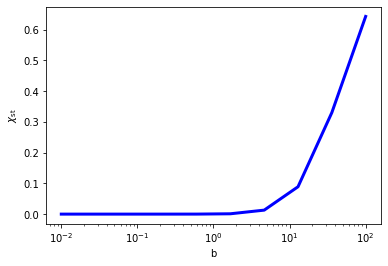

In [7]:
#Distant tide limit: Gnedin et al. 1999 (extended perturber), Spitzer 1958 (point perturber limit)

chi_st=np.zeros(Nb)                                     #Chi_st(b) function of Gnedin et al. 1999
for i in range(Nb):
    chi_st[i]=0.5*((3*J0(impact[i],rp,perturber_flag)-J1(impact[i],rp,perturber_flag)-I0(impact[i],rp,perturber_flag))**2+(2*I0(impact[i],rp,perturber_flag)-I1(impact[i],rp,perturber_flag)-3*J0(impact[i],rp,perturber_flag)+J1(impact[i],rp,perturber_flag))**2+I0(impact[i],rp,perturber_flag)**2)
#plt.loglog(impact,chi_st)
plt.semilogx(impact,chi_st,lw=3,color='b')
plt.xlabel('b')
plt.ylabel('$\chi_{\mathrm{st}}$')
plt.show()

In [8]:
#Distant tide limit: Gnedin et al. 1999 (extended perturber), Spitzer 1958 (point perturber limit)

Etidal=np.zeros(Nb)     #Truncated subject: Internal energy change (Distant tide approx.- extended perturber, Gnedin et al. 99)
Etidal_pt=np.zeros(Nb)  #Truncated subject: Internal energy change (Distant tide approx.- point perturber, Sptzer 58)

for i in range(Nb):
    Etidal[i]=Ftidal(impact[i],Rc,rp,perturber_flag,subject_flag)
    Etidal_pt[i]=Ftidal_pt(impact[i],Rc,subject_flag)


/home/uddipan/Documents/PhD_Yale/thesis/impulsive_encounter/codes/NP-impulse/straight_functions_spherical_perturber.py:381: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(J1_integrand,np.log(1+epsinit),np.log(zetamax),args=(b,rp,perturber_flag,),epsabs=EPSABS_plummer,epsrel=EPSREL_plummer)[0]
/home/uddipan/Documents/PhD_Yale/thesis/impulsive_encounter/codes/NP-impulse/straight_functions_spherical_perturber.py:371: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(J0_integrand,np.log(1+epsinit),np.log(zetamax),args

In [9]:
#-------Writing the data in a file-------

hf = h5py.File('impulsive_straight_orbit_deltaE_perturber%d_subject%d_%.4f.h5' %(perturber_flag,subject_flag,rp), 'w')
hf.create_dataset('impact', data=impact)
hf.create_dataset('Eint', data=Eint)
hf.create_dataset('Eint_trunc', data=Eint_trunc)
hf.create_dataset('Etidal', data=Etidal)
hf.create_dataset('Etidal_pt', data=Etidal_pt)
hf.create_dataset('Eint0', data=Eint0)
hf.create_dataset('Eint0_trunc', data=Eint0_trunc)
hf.close()

"\nhf = h5py.File('impulsive_straight_orbit_deltaE_perturber%d_subject%d_%.4f.h5' %(perturber_flag,subject_flag,rp), 'w')\nhf.create_dataset('impact', data=impact)\nhf.create_dataset('Eint', data=Eint)\nhf.create_dataset('Eint_trunc', data=Eint_trunc)\nhf.create_dataset('Etidal', data=Etidal)\nhf.create_dataset('Etidal_pt', data=Etidal_pt)\nhf.create_dataset('Eint0', data=Eint0)\nhf.create_dataset('Eint0_trunc', data=Eint0_trunc)\nhf.close()\n"

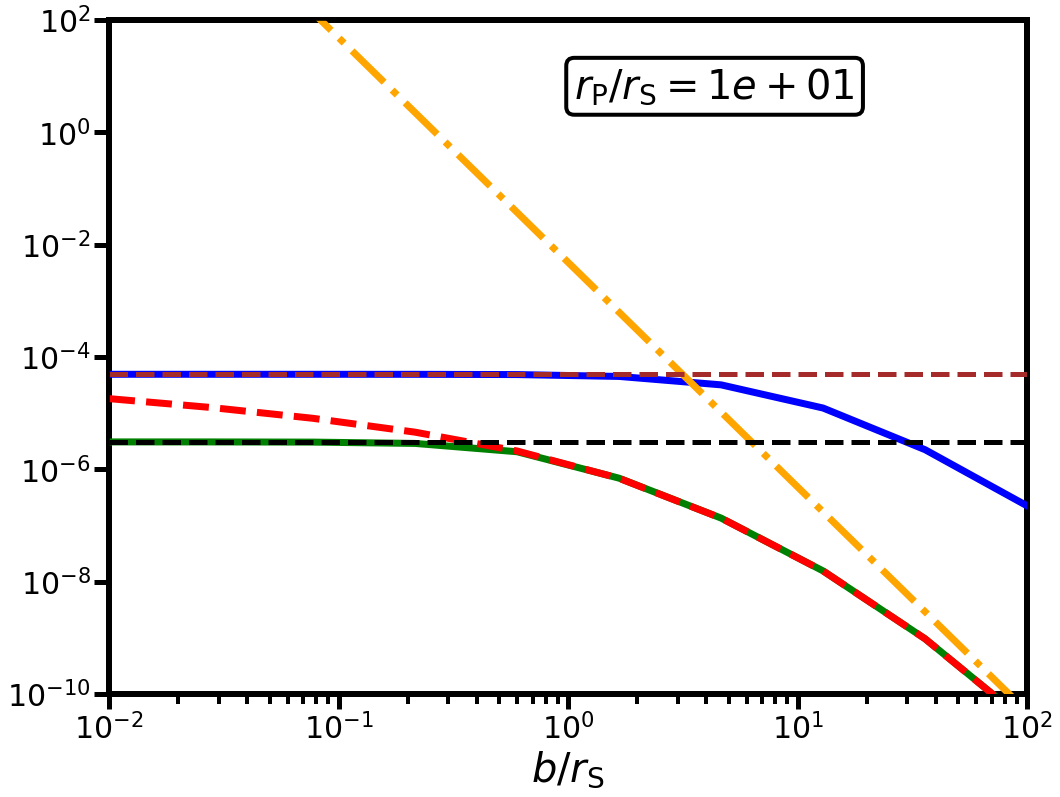

In [11]:
#-------Plots-------

#Internal energy change of subject

fig,ax=plt.subplots(figsize=(17,12))
plt.subplots_adjust(top=0.95,bottom=0.17,left=0.2,right=0.95)

ax.loglog(impact,Eint,color='b',lw=7,label='This work: Infinite')
ax.loglog(impact,Eint_trunc,color='g',lw=7,label='This work: Truncated ($r_{\mathrm{trunc}}=r_{\mathrm{S}}$)')
ax.loglog(impact,Etidal,color='r',lw=7,ls='--',label='Distant tide approximation (GHO99)')
ax.loglog(impact,Etidal_pt,color='orange',lw=7,ls='-.',label='Distant tide approximation (S58)')

#if (perturber_flag==2):
ax.axhline(y=Eint0,color='brown',lw=5,ls='--')
ax.axhline(y=Eint0_trunc,color='k',lw=5,ls='--')

ax.tick_params(which='major', width=5, length=15, color='k')
ax.tick_params(which='minor', width=4, length=10, color='k')
ax.set_xticks(np.logspace(np.log10(bmin),np.log10(bmax),num=(int)(np.log10(bmax)-np.log10(bmin)+1)))
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.NullFormatter())
ax.set_yticks(np.logspace(np.log10(1e-10),np.log10(1e2),num=7))
#ax.set_yticks([],[])
ax.set_xlim([bmin,bmax])
ax.set_ylim([1e-10,1e2])
ax.tick_params(labelsize=30)
              
ax.set_xlabel('$b/r_{\mathrm{S}}$',fontsize=40)
#ax.set_ylabel('$\Delta E_{\mathrm{int}}$',fontsize=70)
#leg=ax.legend(loc=3,fontsize=30.5)
#leg.get_frame().set_edgecolor('k')
#leg.get_frame().set_linewidth('5.0')
ax.patch.set_edgecolor('k')  
ax.patch.set_linewidth('6')

fig.text(0.58, 0.86, '$r_{\mathrm{P}}/r_{\mathrm{S}}=%.0e$' %(rp), bbox=dict(boxstyle='round', facecolor='none', edgecolor='black', linewidth=4, pad=0.2, alpha=1), fontsize=40)

plt.savefig('impulsive_encounter_perturber%d_subject%d_rp%.4f.jpg' %(perturber_flag,subject_flag,rp))

plt.show()